In [4]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
from skimage.io import imread
from skimage.transform import resize

In [5]:
data_dir = os.path.join(os.getcwd(),'cat_dog_data')
categories = ['cats', 'dogs']

data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in tqdm(os.listdir(os.path.join(data_dir, category))):
        img_path = os.path.join(data_dir, category, file)
        img = imread(img_path)
        img = resize(img, (16, 16))
        data.append(img)
        labels.append(category_idx)

data = np.array(data)
labels = np.array(labels)


100%|██████████| 1012/1012 [00:51<00:00, 19.52it/s]


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Reshape the data to 2D
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1,criterion='log_loss')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


0.6518518518518519


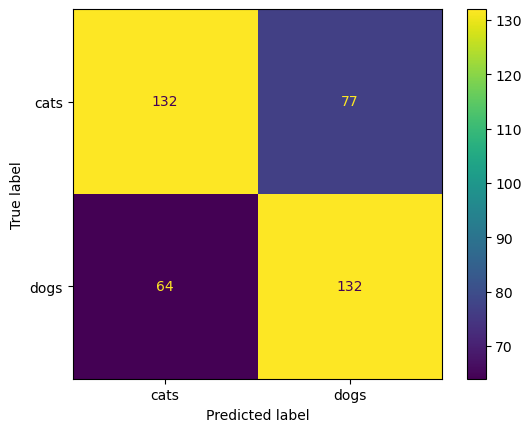

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(accuracy_score(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot()
plt.show()